In [19]:
#importing the pytorch library
import torch

#pytorch version and device
print("Pytorch version", torch.__version__)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using device:", device)

#create & inspect tensors
t1 = torch.tensor([[1,2],[3,4]] , dtype = torch.float32)
t2 = torch.rand(2,2)
print("t1:" , t1, "shape:", t1.shape)
print("t2:", t2)

#Basic ops
print("Add:", t1 + t2)
print("MatMul:", t1 @ t2) #note "@" is for matric multiplication only

#Move to GPU if available
t1_gpu = t1.to(device)
print("t1 on", t1_gpu.device)


Pytorch version 2.7.1
using device: cpu
t1: tensor([[1., 2.],
        [3., 4.]]) shape: torch.Size([2, 2])
t2: tensor([[0.7998, 0.3779],
        [0.6875, 0.1709]])
Add: tensor([[1.7998, 2.3779],
        [3.6875, 4.1709]])
MatMul: tensor([[2.1748, 0.7198],
        [5.1494, 1.8175]])
t1 on cpu


In [20]:
#Importing torch vision library 
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

#function to transform data to tensors
transform = transforms.ToTensor()

#Download MNIST Dataset
train_ds = datasets.MNIST(root ="data", train = True, download=True, transform=transform)
test_ds =  datasets.MNIST(root = "data", train = False,download=True, transform=transform )
print("Train size:", len(train_ds) , "test size::", len(test_ds))

Train size: 60000 test size:: 10000


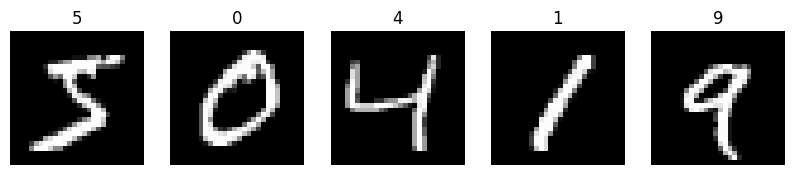

single image shape: torch.Size([1, 28, 28])


In [21]:
#visualizing some samples with Matplotlib
fig, axes = plt.subplots(1,5, figsize=(10,2))
for i, ax in enumerate(axes):
    img, label = train_ds[i]
    ax.imshow(img.squeeze(), cmap="gray")
    ax.set_title(label)
    ax.axis(False)
plt.show()

#checking tensor shape
img, label = train_ds[0]
print("single image shape:", img.shape)

batch images torch.Size([64, 1, 28, 28])
batch labels torch.Size([64])


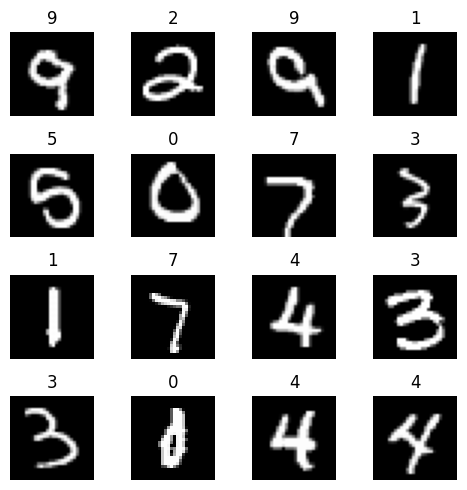

In [27]:
#Import Data loader
from torch.utils.data import DataLoader

BATCH_SIZE = 64

#Create batch loaders
train_loader = DataLoader(train_ds, batch_size= BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_ds,  batch_size = BATCH_SIZE)

#Inspect one batch
images, labels = next(iter(train_loader))
print("batch images", images.shape)
print("batch labels", labels.shape)

#plot a 4 X 4 grid from batch
fig, axes = plt.subplots (4,4, figsize=(5,5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].squeeze(), cmap="gray")
    ax.set_title(int(labels[i]))
    ax.axis(False)
plt.tight_layout()
plt.show()